# Documenting Python and Markdown Ways by Example

## Import Needed Packages

In [1]:
import matplotlib.pyplot as plt
import warnings  #to suppress warnings when needed
warnings.filterwarnings('ignore')  #suppress all warnings
import numpy as np
import qmcpy as qp
import scipy as sc
from simple_colors import *
import sympy as sy
import time

### Some LaTeX macros (hidden in math mode)
$
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\DeclareMathOperator{\disc}{disc}
\newcommand{\norm}[2][{}]{{\left \lVert #2 \right \rVert}_{#1}}
$

## Printing

In [2]:
pi = np.pi
print("The variable a is",pi,f"or",green('approximately', ['underlined', 'bold', 'italic']),f"the value {pi:.4f}")  
    #labeling the output and using f-strings and colors
print("The variable pi is approximately %.4f but not %.8e"%(pi,np.e))  

The variable a is 3.141592653589793 or approximately the value 3.1416
The variable pi is approximately 3.1416 but not 2.71828183e+00


In [3]:
print('Hello world',end = '', flush = True)  #controling line feeds
print('Goodbye world')

Hello worldGoodbye world


## Variables and arrays

### Initializing

In [4]:
x = np.zeros(5,dtype=bool)  #initialize an array with Boolean entries
x[2]=True
print("x =",x)

x = [False False  True False False]


### Plus equals (+=)

In [5]:
y = np.array(range(9), dtype=float)
print('y =',y)
y += 1
print('y =',y)
y += np.array(range(-3,6))
print('y =',y)
y *= np.array(np.linspace(0,4.5,9))
print('y =',y)

y = [0. 1. 2. 3. 4. 5. 6. 7. 8.]
y = [1. 2. 3. 4. 5. 6. 7. 8. 9.]
y = [-2.  0.  2.  4.  6.  8. 10. 12. 14.]
y = [-0.    0.    2.25  6.75 13.5  22.5  33.75 47.25 63.  ]


### Transpose, reshaping, and performing operations on arrays

In [6]:
f = lambda x,y : np.prod(2 - np.maximum(x,y), axis = -1)  #a function that might mimic what is in a discrepancy calculation
print(f(0.4,0.7))

1.3


In [7]:
x1 = np.random.random((10**3,7))  #an arbitrary 2-D array
sz = x1.shape
x2 = np.random.random(sz)  #another arbitrary array of the same size
print("size of x =", sz)
#print("x1 = ",x1)
#print("x2 = ",x2)
startarray = time.time()
y = f(x1.reshape(sz[0],1,sz[1]),x2.reshape(1,sz[0],sz[1])) #using reshape is a way to evaluate the function via arrays
endarray = time.time()
#print("y ", y.shape, " = ",y)
print(f"elapsed time for array = {endarray-startarray:.4} seconds")
startloop = time.time()
z = np.zeros((sz[0],sz[0]))
for i in range(sz[0]):  #this is a way to evaluate the function via a for loop
    for j in range(sz[0]):
        z[i,j] = f(x1[i,:],x2[j,:])
endloop = time.time()    
#print("z ", z.shape, " = ",z)
diff_between = np.max(np.abs(y-z))  #the answers are the same if this is 0
if diff_between < np.finfo(float).eps:
    print("there is no difference between two methods")
else:
    print("the maximum difference between two methods =",diff_between)
print(f"elapsed time for loop = {endloop-startloop:.4} seconds")
print(f"     so loop is {(endloop-startloop)/(endarray-startarray):.3} times slower than array")

size of x = (1000, 7)
elapsed time for array = 0.04507 seconds
there is no difference between two methods
elapsed time for loop = 2.542 seconds
     so loop is 56.4 times slower than array


### Stacking or concatenating
See [this link](https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack) for more concatenating options

In [8]:
y = np.array([range(9),range(29,47,2)]).T  #initialize two dimensional array using the range command
print('y =',y)
y1 = np.vstack((y,y[:3])) #copying top three rows to the bottom by vstack
print('y1 = ',y1)
y2 = np.hstack((y,y[:,1,None])) #copying second column to the right by hstack
print('y2 = ',y2)
y3 = np.column_stack((y,y[:,1])) #copying second column to the right by columnstack, same as y2
print('y3 = ',y3)

y = [[ 0 29]
 [ 1 31]
 [ 2 33]
 [ 3 35]
 [ 4 37]
 [ 5 39]
 [ 6 41]
 [ 7 43]
 [ 8 45]]
y1 =  [[ 0 29]
 [ 1 31]
 [ 2 33]
 [ 3 35]
 [ 4 37]
 [ 5 39]
 [ 6 41]
 [ 7 43]
 [ 8 45]
 [ 0 29]
 [ 1 31]
 [ 2 33]]
y2 =  [[ 0 29 29]
 [ 1 31 31]
 [ 2 33 33]
 [ 3 35 35]
 [ 4 37 37]
 [ 5 39 39]
 [ 6 41 41]
 [ 7 43 43]
 [ 8 45 45]]
y3 =  [[ 0 29 29]
 [ 1 31 31]
 [ 2 33 33]
 [ 3 35 35]
 [ 4 37 37]
 [ 5 39 39]
 [ 6 41 41]
 [ 7 43 43]
 [ 8 45 45]]


### Accessing subarrays

In [9]:
u = y[-3:,]  #last three rows
print('u = ',u)

u =  [[ 6 41]
 [ 7 43]
 [ 8 45]]


In [10]:
z = y[(y[:,0] <= 3),:]  #choose only those rows that meet a certain criterion
w = y[:,(y.sum(0) > 100)]  #or choose only those columns that meet a certain criterion, note that "sum" is a method
print('z =',z,'\nw =',w)  #\n means new line

z = [[ 0 29]
 [ 1 31]
 [ 2 33]
 [ 3 35]] 
w = [[29]
 [31]
 [33]
 [35]
 [37]
 [39]
 [41]
 [43]
 [45]]


### Methods (functions) for arrays

For more see [this link](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

In [11]:
column_min = y.mean(0)
row_min = y.mean(1)
print('column and row minima are \n',column_min,row_min)
mean = y.mean(0)
std = y.std(0,ddof=1)  #unbiased standard deviation
# also, min, max, argmin, argmax, 
print('mean and standard deviation are \n',mean,std)
sumofmeans = y.mean(0).sum()
prodofmeans = y.mean(0).prod()
print('sum of means is', sumofmeans, 'and their product is', prodofmeans)

column and row minima are 
 [ 4. 37.] [14.5 16.  17.5 19.  20.5 22.  23.5 25.  26.5]
mean and standard deviation are 
 [ 4. 37.] [2.73861279 5.47722558]
sum of means is 41.0 and their product is 148.0


### Dictionaries and lists

[1. 1. 0.]
0.28209479177387814


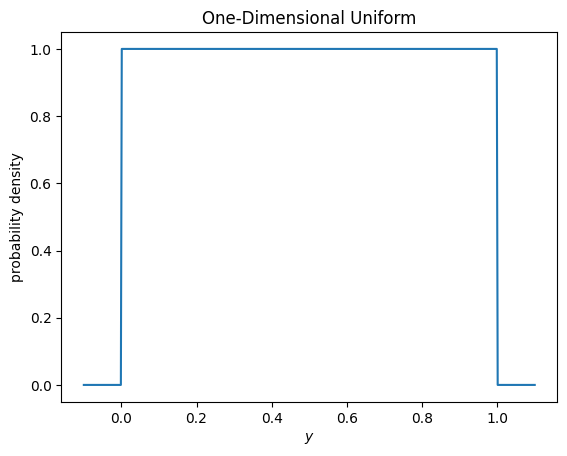

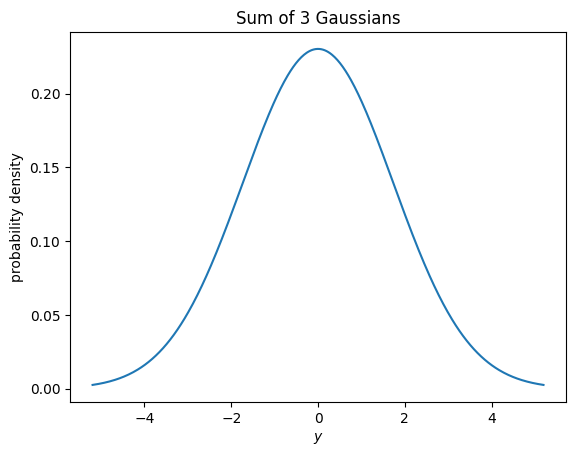

In [13]:
uniform_1 = {
    "f" : lambda x: x[:,0],  #just take the first coordinate
    "density" : lambda y,d : np.where((y >= 0) & (y <= 1),1.,0.),
    "y_domain" : lambda d : np.array([-0.1,1.1]),
    "name" : lambda d=1 : "One-Dimensional Uniform"}
sum_d_Gauss = {
    "f" : lambda x: np.sum(sc.stats.norm.ppf(x),axis = 1),  #sum of d standard Gaussians is a Gaussian with variance 
    "density" : lambda y,d : sc.stats.norm.pdf(y,scale = np.sqrt(d)),
     "y_domain" : lambda d : np.array([-3*np.sqrt(d),3*np.sqrt(d)]),
    "name" : lambda d : f"Sum of {d:.0f} Gaussians"}
print(uniform_1["density"](np.array([0.5,1,1.5]),1))
print(sum_d_Gauss["density"](0,2))
ex_densities = [uniform_1,sum_d_Gauss]
d = 3
for ii in range(len(ex_densities)):
    fig,ax = plt.subplots()
    domain = ex_densities[ii]["y_domain"](d)
    yplot = np.linspace(domain[0],domain[1],500)
    rhoplot = ex_densities[ii]["density"](yplot,d)
    ax.plot(yplot, rhoplot),
    ax.set_title(ex_densities[ii]["name"](d))
    ax.set_xlabel("$y$")
    ax.set_ylabel("probability density")    

## Plotting

In [14]:
n = 64
d = 3
xpts = qp.Sobol(d, randomize = False).gen_samples(n)  #unscrambled Sobol points, suppressed warning that is not randomized

### 1-Dimensional Plot

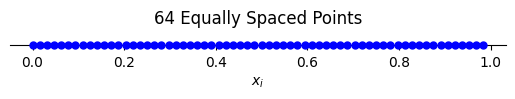

In [15]:
fig, ax = plt.subplots()
ax.plot(xpts[:,0], np.zeros_like(xpts[:,0]), 'b.', markersize = 10, zorder=10, clip_on=False)  #just the first coordinate
ax.set_ylim([0, 3e-2])
ax.set_title(f"{n:.0f} Equally Spaced Points")
ax.set_xlabel("$x_i$")
ax.set_aspect(1)
ax.axes.get_yaxis().set_visible(False)  #turn off the tics on the vertical axis
ax.spines[['top','right','left']].set_visible(False)  #turn off the bounding box on the top and sides

### 2-Dimensional Plot

#### 2-D Plot with Different Scales
[See this url for details](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

### 3-Dimensional Plot

#### Color Map or Contour Plot

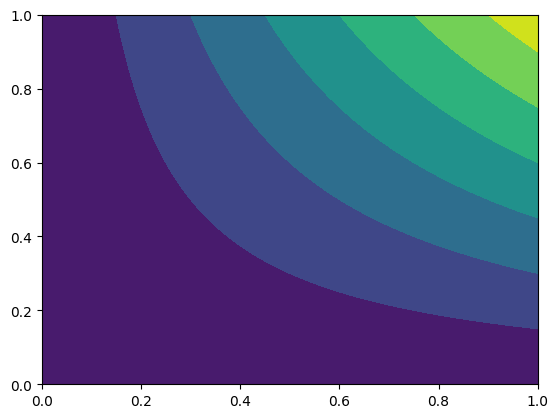

In [8]:
f = lambda x: x[:,0]*x[:,1]
xticks = np.linspace(0,1,100)
yticks = xticks
xmesh,ymesh = np.meshgrid(xticks,yticks)
zvalues = f(np.hstack([xmesh.flatten()[:,None],ymesh.flatten()[:,None]]))
zmesh = zvalues.reshape(xmesh.shape)
figure, axis = plt.subplots()
axis.contourf(xmesh,ymesh,zmesh);

## Symbolic Computation

In [12]:
x, y, z = sy.symbols('x y z')
y = (x + 1)**2
print('y = ',y)
a = sy.diff(y,x)
print('a = ',a)

y =  (x + 1)**2
a =  2*x + 2


### Example from discrepancy

In [13]:
x, t = sy.symbols('x t',positive =  True)
K = 2 - sy.Max(x,t) #kernel for the L2 star discrepancy
intK = sy.simplify(sy.integrate(K,(t,0,1))) #integral of the kernel with respect to one variable
print(intK)
intintK = sy.simplify(sy.integrate(intK,(x,0,1))) #integral of the kernel with respect to both variables
print(intintK)

-x*Min(1, x) + Min(1, x)**2/2 + 3/2
4/3


## Making Colab Notebooks

## Images 
See [this link](https://medium.com/@yogeshkd/four-ways-to-embed-images-in-your-jupyter-notebook-powered-blog-2d28f6d1b6e6) for more information